### 1) How would you define clustering? Can you name a few clustering algorithms?

Clustering is an unsupervised learning model where the goal is to separete the instances in groups (or cluster) according to their similarities. The two most famous clustering algorithms are k-means and DBScan. K-means works by setting k cluster centroids randomly across the features spaces, and then, for each instance, assign it to the cluster which the centroid is the nearest to this instance. After assigning all instances to clusters, it defines new cluster centroids as the average of each instance in each initial cluster and assigns again each instance to the nearest centroid, creating new clusters. This process is repeated until convergence. DBScan on the other hand, starts by counting, for each instance, the number of other instances near (to a predefined distance) to this one, and if this number is high enough (to a predefined level), it is considered a core instance. All the neighboring instances to the core instances form a cluster and, when overlap occurs, they are merged in a single cluster. Other clustering algorithms are Gaussian Mixture Models.

### 2) What are some of the main applications of clustering algorithms?

One could use clustering for customer segmentation, for example, as reccomendation system based on similar characteristics. It could also be used for image segmentation and image compression (like in the ladybug example). In addition, you could use clustering in semi-supervided learning models, when you dont have labels on all observations. Finally, you could use for anomaly and novelty detection

### 3) Describe two techinques to select the right number of clusters when using k-means.

The first method would be the elbow method: plot the inertia* for distinct values of k and choose the one where the marginal loss in inertia starts to become small enough
A second method would to choose the k which generates the highest silhouet score**
*Inertia here is the sum squared distance between each instance and their centroid.
**The silhouet score is an metric of within cluster similarities. It computes the mean within cluster distances $a$ and the mean intra-cluster distance $b$ to the nearest cluster and computes a value between -1 and 1: $(b-a)/max(b,a)$

### 4) What is label propagations? Why would you implement it, and how?

Label propagation is the technique of assigning the label value of a instance to all other instances within the cluster. One could use it in semi-supervised learning methods, where you don't have label data for all instances. You could use any clustering algorithm, such as K-means (if you know the right number of clusters) or DBScan to aggregate instances into clusters, and then propagate the label of the most representative instance (the one nearest to the centroid) to all unlabeled ones. Note that the core instances may not have a label, in which case it should be labeled by hand.

### 5) Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

K-Means and BIRCH scales well to large datasets ,while dbscan and Mean-Shift look for regions of high density.

### 6) Can you think of a use case where active learning would be useful? How would you implement it?

In some cases: in the label propagation example above a human would need to label, by hand, the core instances. Another use case would be anomaly detection: when an anomaly is detected, a human could check it.

### 7) What is the difference beweeen anomaly detection and novelty detection?

Anomaly detection is finding an instance that is too distinct from other due possibly to mistakes, and you could take then out of the training process. Novelty detection, on the other hand, is a technique to find instances that are too different from the ones which the model was trained.

### 8) What is a Gaussian mixture? What tasks can you use it for?

Gaussian Mixture Models are a class of models that assume the data was generated by a mixture of Gaussian distributions with parameters unknown. You can use then for clustering.

### 9) Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

Akaike and Bayesian Information Criteria.

### 10) The classic Olivetti faces dataset contains 400 grayscale 64x64 pixel images of faces. Each image is flat-tened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual taks is to train a model that can predict which person is represented in each picture. Load the dataset using the sklean.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set an a test set (note theat the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techinques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [128]:
from sklearn.datasets import fetch_olivetti_faces

In [129]:
#Load olivetti faces and split into training and testing
faces = fetch_olivetti_faces()
y = faces.target
X = faces.data

#Split (stratified) into train, validation and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (1/2), stratify = y)

In [130]:
#Run K-means for k:10-50 (since there are 40 people, I would expect it to find around 40 clusters)
from sklearn.cluster import KMeans
ranges = range(10, 150, 5)
kmeans_models = [KMeans(n_clusters = k, n_init = 10, random_state = 10).fit(X_train) 
                 for k in ranges]


In [131]:
from sklearn.metrics import silhouette_score
inertias = [model.inertia_ for model in kmeans_models]
silhouetts = [silhouette_score(X_train, model.labels_) for model in kmeans_models]

In [132]:
#see the take of the model with highest silhouette
import numpy as np
index = np.argmax(silhouetts)
best_k = ranges[index]
best_silhouett  = silhouetts[index]
best_inertia = inertias[index]
best_model = kmeans_models[index]
print(best_k)

80


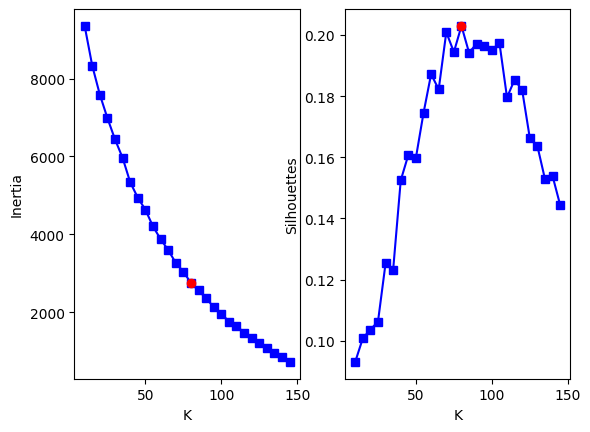

In [133]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 1, ncols = 2)
#Plot inertias
plt.subplot(1,2,1)  
plt.plot(ranges, inertias, "bs-")
plt.xlabel("K")
plt.plot(best_k, best_inertia, "ro")
plt.ylabel("Inertia")

#Plot Silhouet
plt.subplot(1,2,2) 
plt.plot(ranges, silhouetts, "bs-")
plt.plot(best_k, best_silhouett, "ro")
plt.xlabel("K")
plt.ylabel("Silhouettes")

plt.show()

C:\Users\xande\AppData\Local\Temp\ipykernel_15108\3898320211.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(nrows = 1, ncols = len(figs))


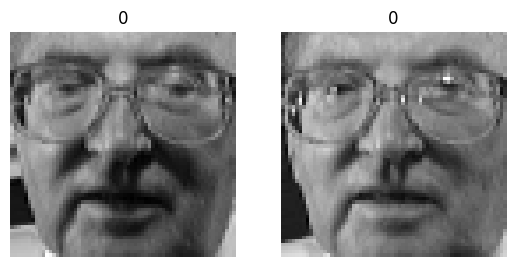

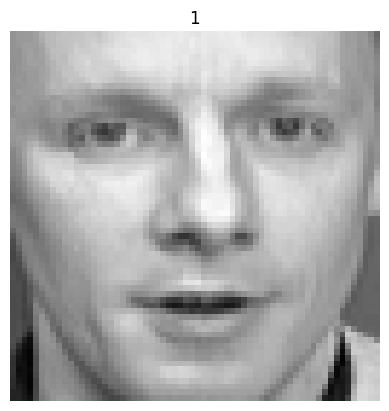

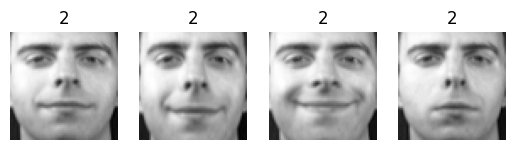

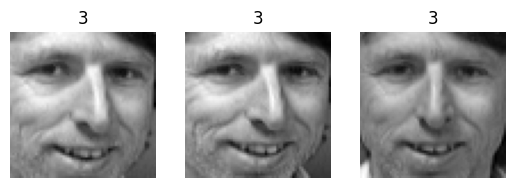

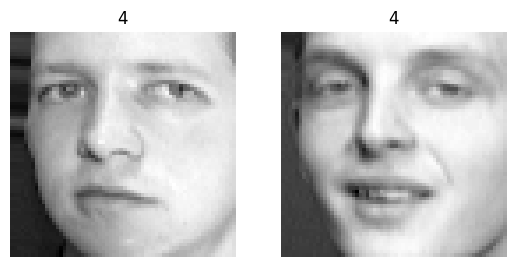

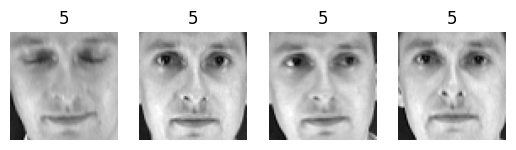

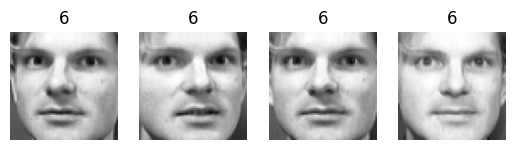

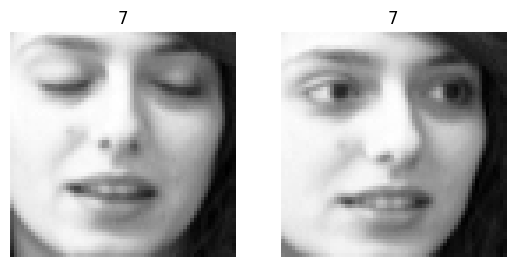

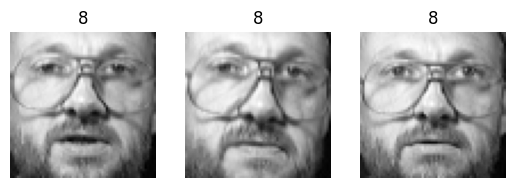

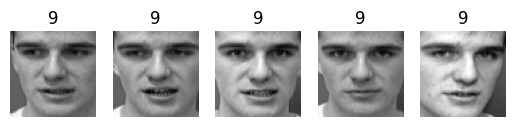

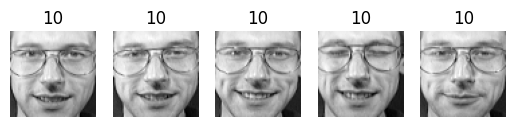

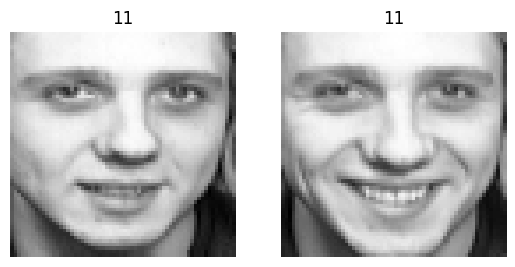

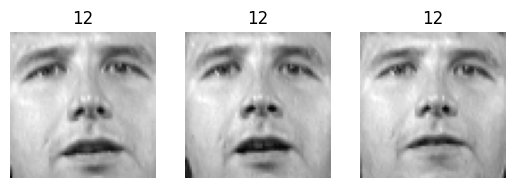

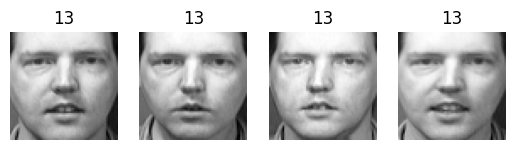

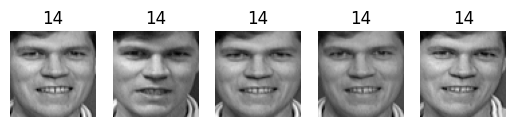

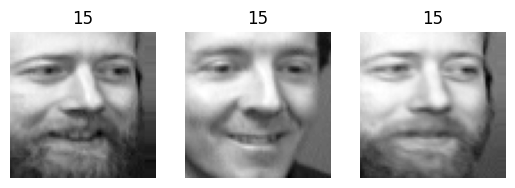

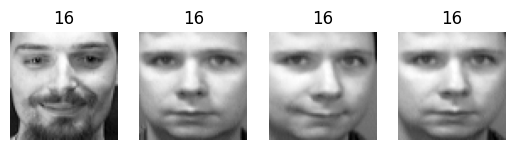

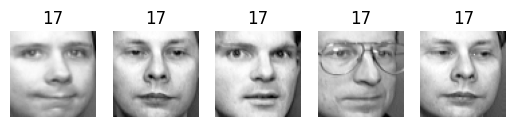

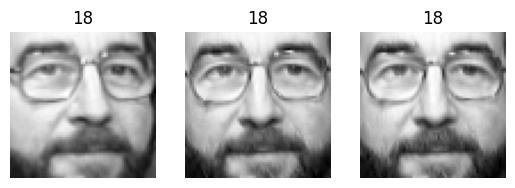

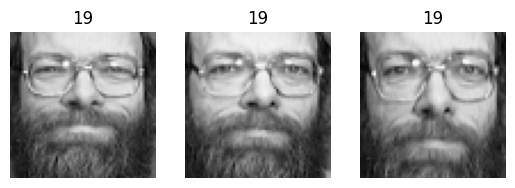

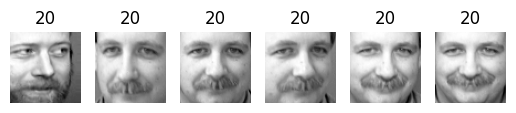

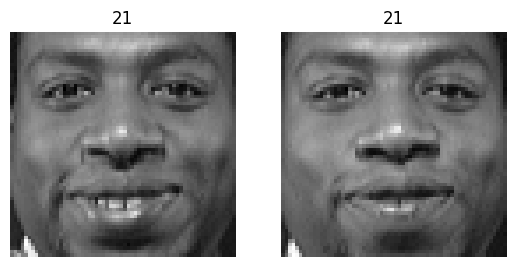

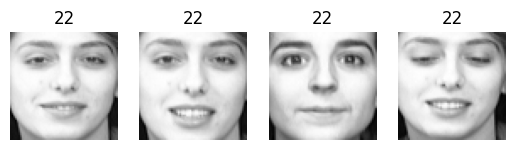

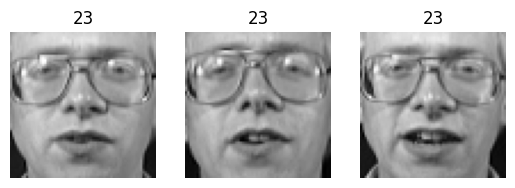

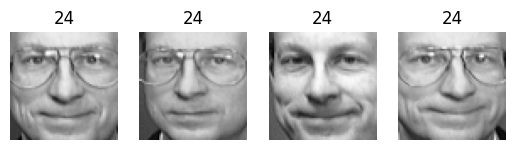

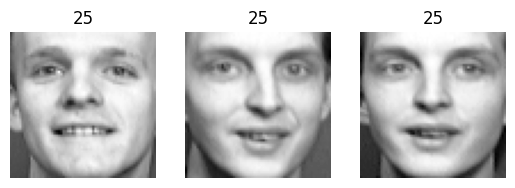

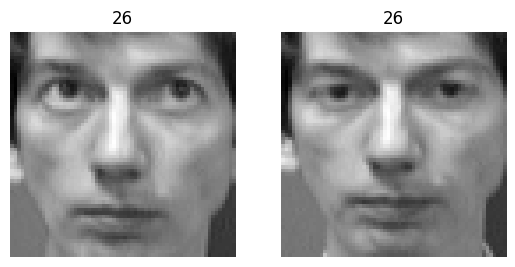

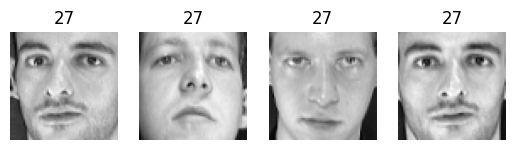

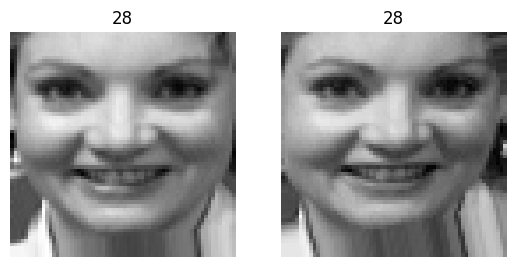

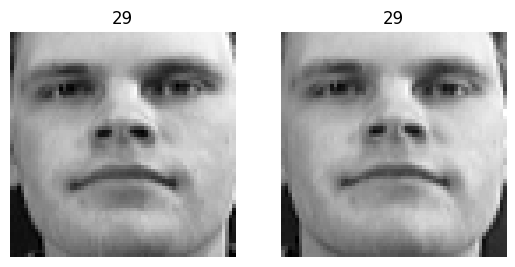

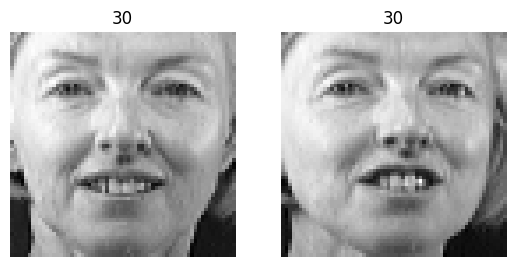

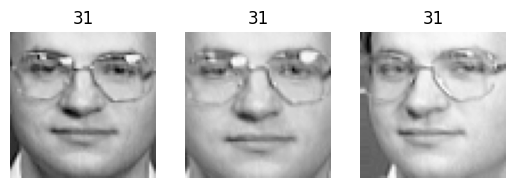

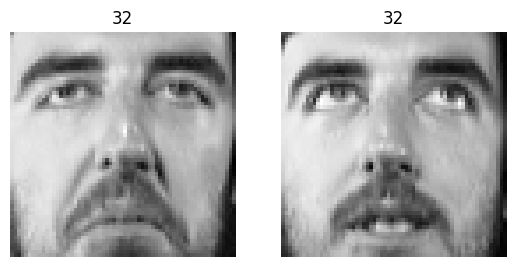

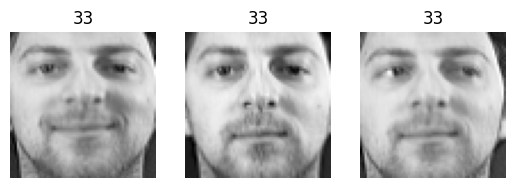

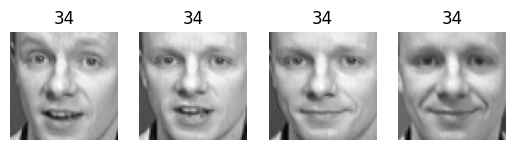

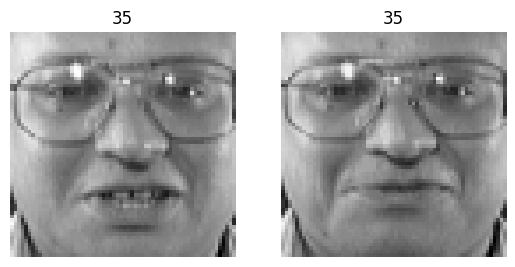

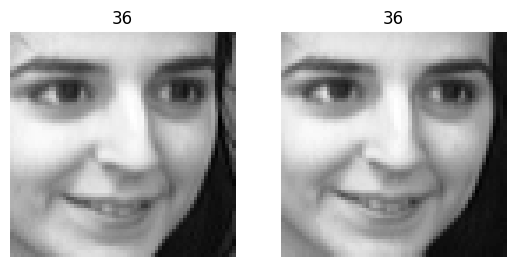

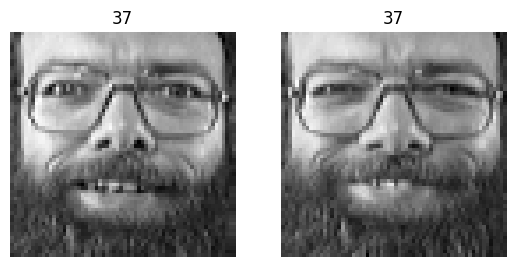

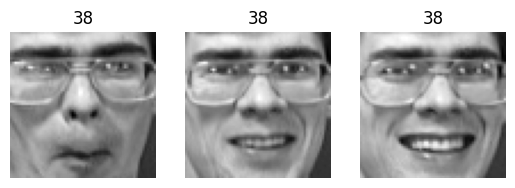

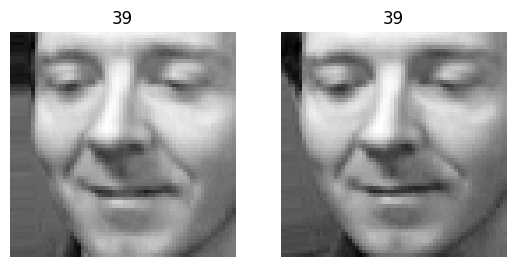

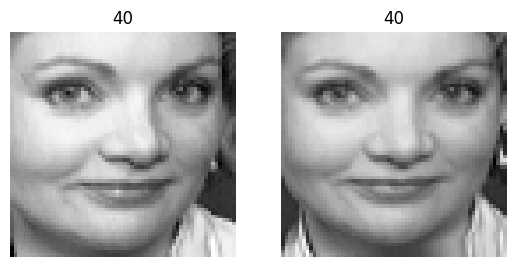

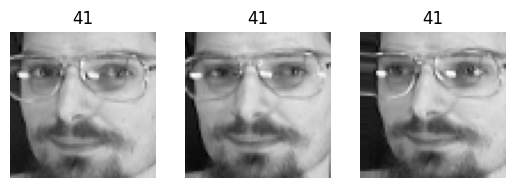

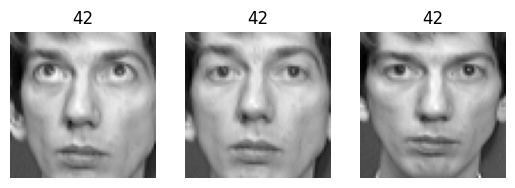

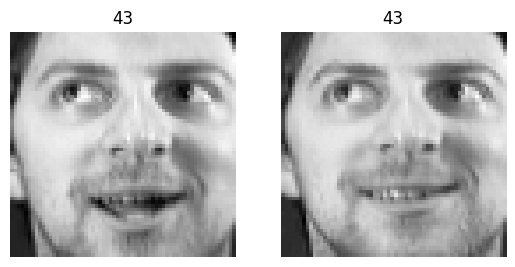

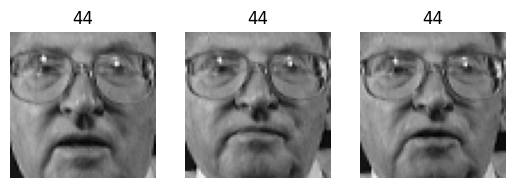

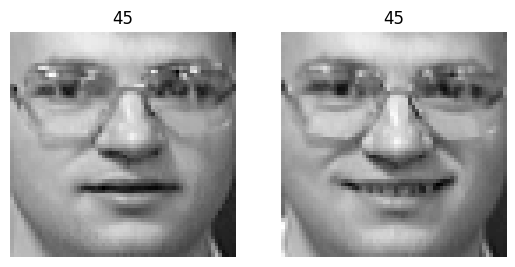

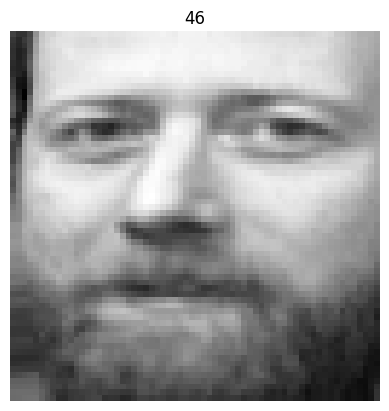

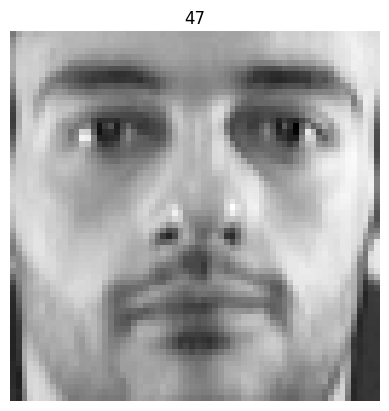

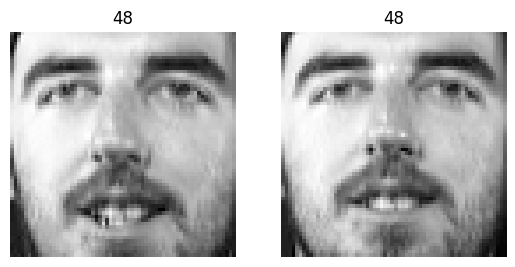

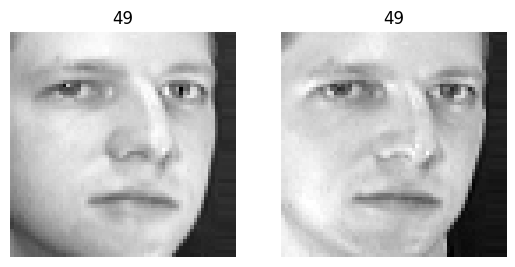

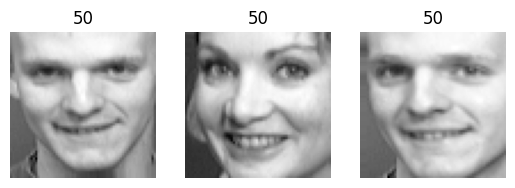

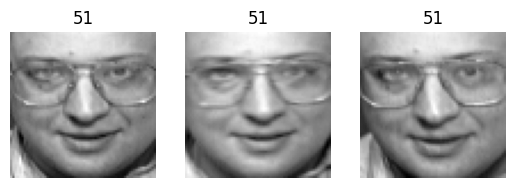

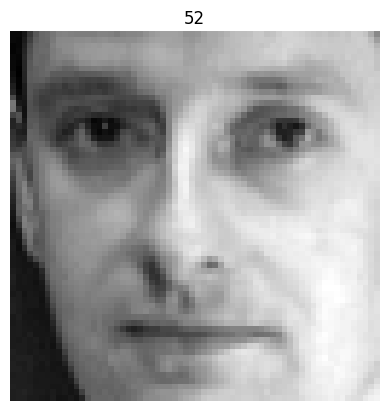

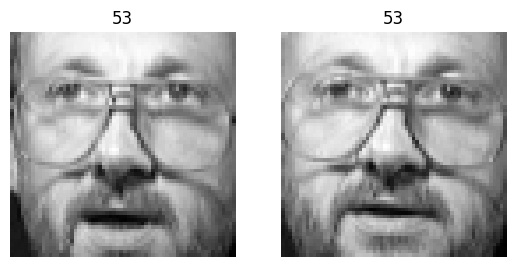

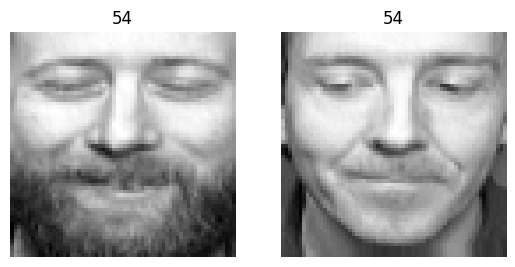

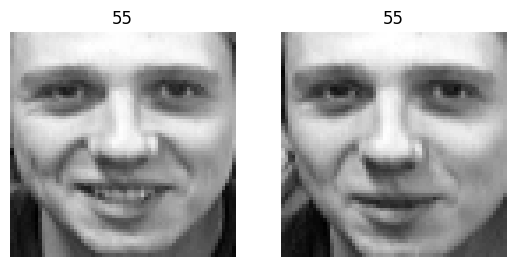

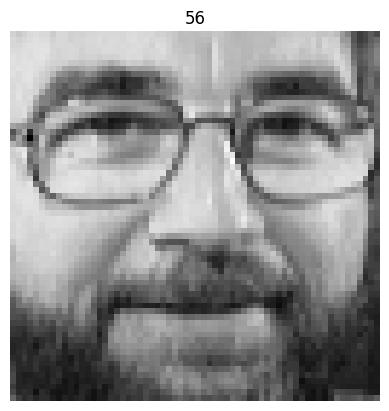

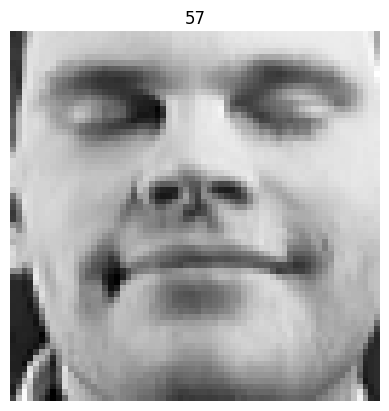

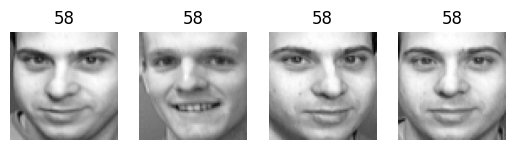

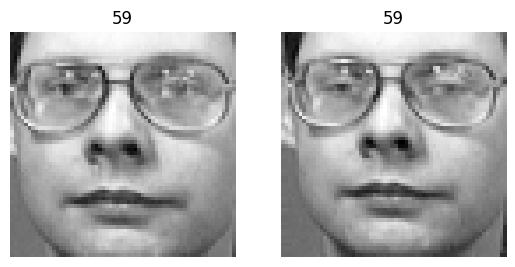

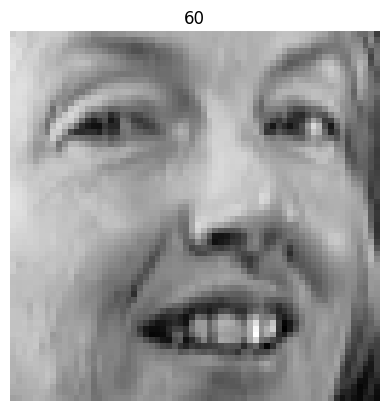

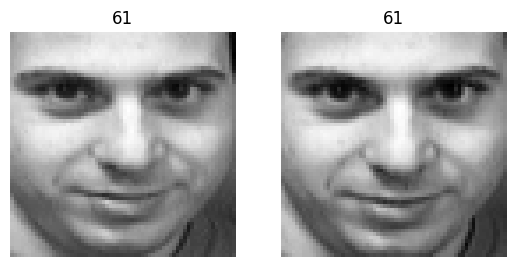

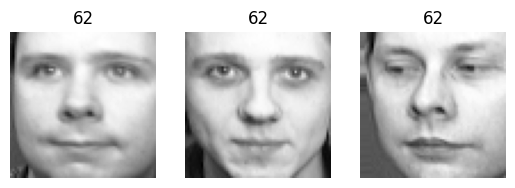

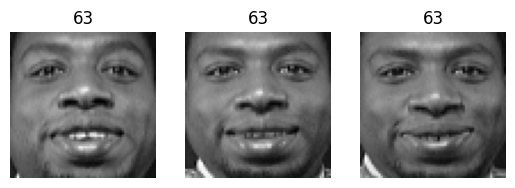

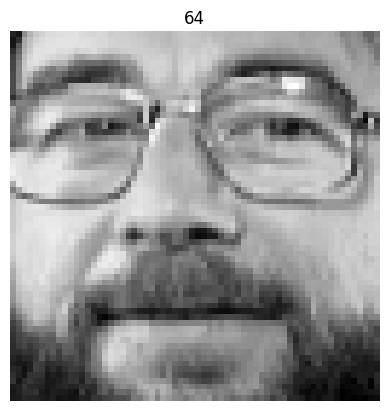

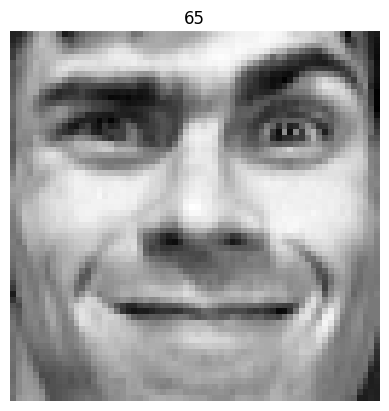

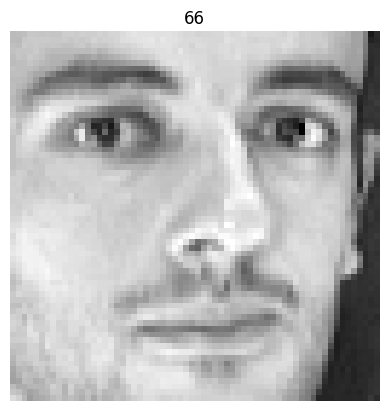

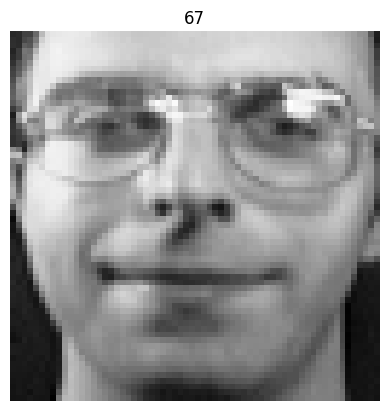

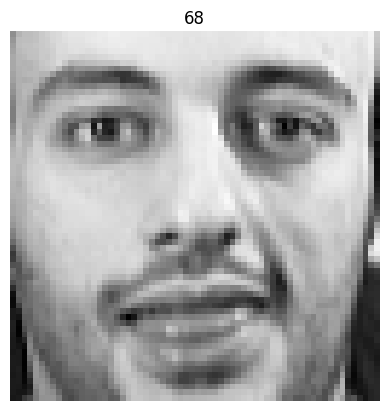

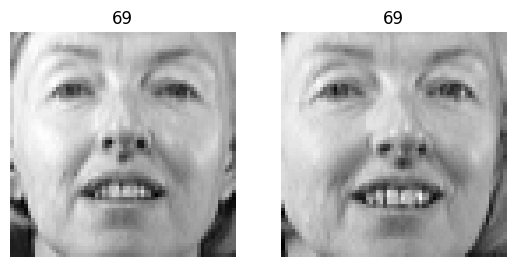

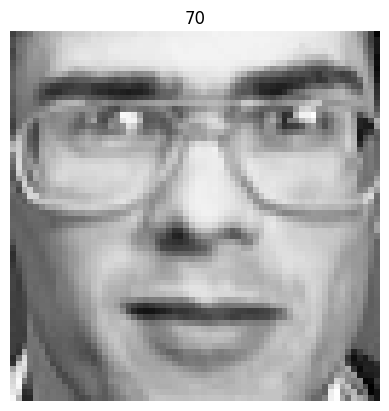

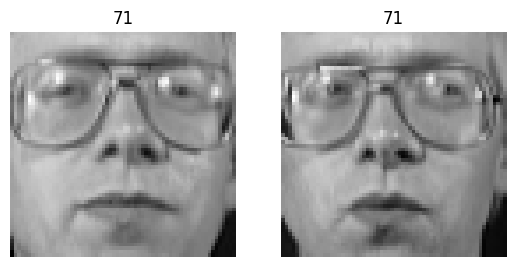

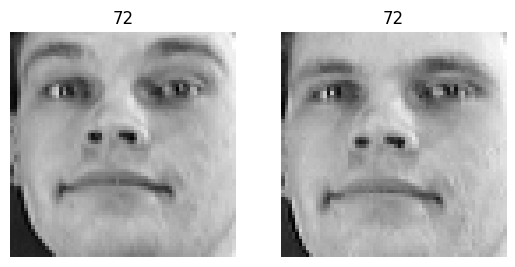

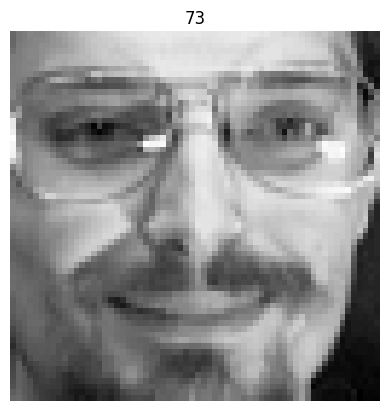

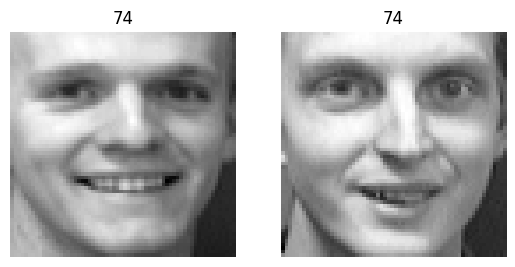

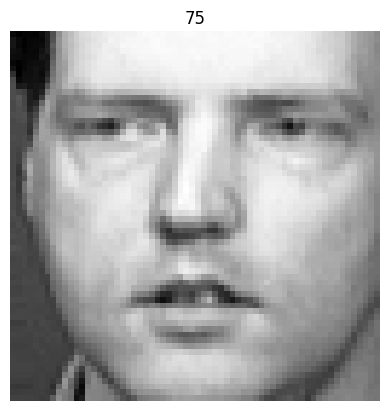

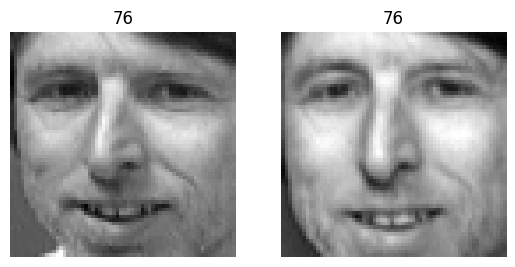

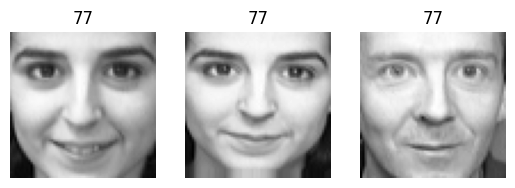

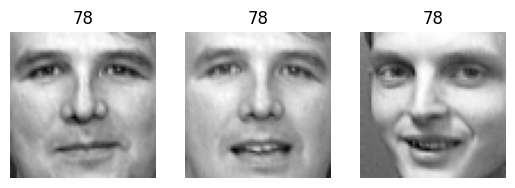

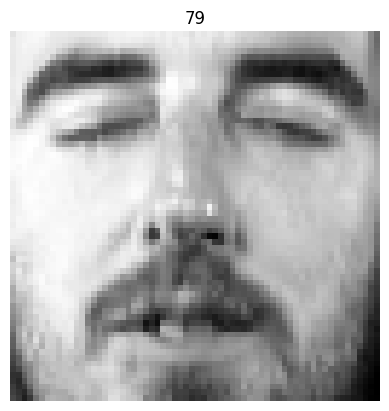

In [ ]:
#Visualize clusters
def plot_image(image):
    image = image.reshape(64,64)
    plt.imshow(image, cmap = "grey", vmin = 0, vmax = 1)
    plt.axis("off")

def plot_cluster(cluster):
    figs = X_train[best_model.labels_ == cluster]
    plt.subplots(nrows = 1, ncols = len(figs))
    for index in range(len(figs)):
        plt.subplot(1,len(figs),index + 1)
        plt.title(cluster)
        plot_image(figs[index])

    plt.show


for i in range(best_k):
    plot_cluster(i)


### 11) Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-means as a dimensionality reduction too, and train a classifier on the reduced set. Seach for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [135]:
#Train a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.94

In [136]:
#Use k-means as dimensionality reduction
from sklearn.pipeline import make_pipeline
km_pipe = make_pipeline(
    KMeans(n_clusters = 100, random_state = 10),
    RandomForestClassifier(n_estimators = 100, random_state = 10)
)

km_pipe.fit(X_train, y_train)
km_pipe.score(X_test, y_test)


0.76

In [137]:
#Search for the best params
from sklearn.model_selection import GridSearchCV
km_pipe = make_pipeline(
    KMeans(random_state = 10),
    RandomForestClassifier(n_estimators = 100, random_state =10)
)

param_grid = [{
    'kmeans__n_clusters' : range(10,130,5),
    'randomforestclassifier__n_estimators' : range(20, 120, 10)
}]
grid = GridSearchCV(km_pipe, param_grid, cv = 3, scoring = "accuracy", n_jobs = -2)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(grid.best_params_)


{'kmeans__n_clusters': 85, 'randomforestclassifier__n_estimators': 110}


In [138]:
#Append transformed data to original data and train the model again
best_knn = KMeans(random_state = 10, n_clusters = 110).fit(X_train)
X_train_transfomed = best_knn.transform(X_train)
X_test_transformed = best_knn.transform(X_test)
X_train_concat = np.concatenate([X_train, X_train_transfomed], axis = 1)
X_test_concat = np.concatenate([X_test, X_test_transformed], axis = 1)
rf_clf = RandomForestClassifier(n_estimators = 80, n_jobs = -2, random_state = 10)
rf_clf.fit(X_train_concat, y_train)
rf_clf.score(X_test_concat, y_test)


0.925

Hence, even inputing the reduced dataset in the original dataset, we couldnt get better estimates than without then.

### 12) Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

In [139]:
#Run PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components = 0.99)
pca.fit(X_train)
X_reduced = pca.transform(X_train)

In [140]:
#Train a Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 40, n_init = 10)
gm.fit(X_reduced)

GaussianMixture(n_components=40, n_init=10)

In [141]:
#Use the model to generate new faces
n_new_faces = 20
new_faces = gm.sample(n_samples = n_new_faces)
X_reduced_new_faces = new_faces[0]
y_new_faces = new_faces[1]

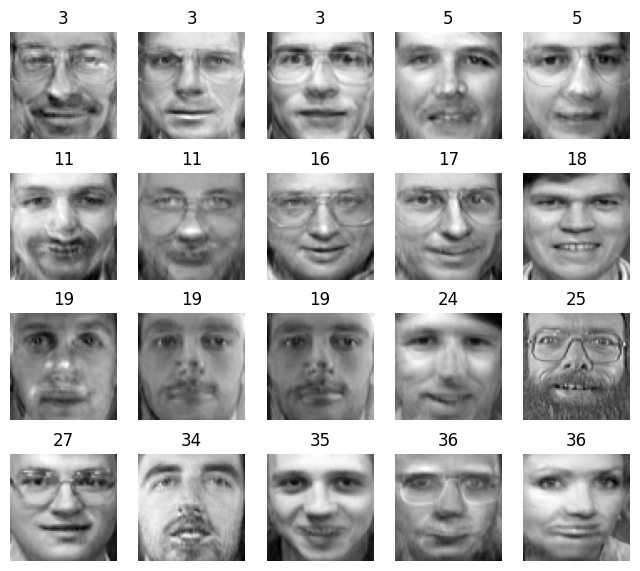

In [142]:
#Visualize new faces
X_reconstructed_new_faces = pca.inverse_transform(X_reduced_new_faces)

plt.subplots(nrows = 4, ncols = 5, figsize = (8,7))
for i in range(len(X_reconstructed_new_faces)):
    plt.subplot(4,5, i+1)
    plot_image(X_reconstructed_new_faces[i])
    plt.title(y_new_faces[i])
    
    
plt.show()
    

In [160]:
#Modify some images

#rotate
from scipy.ndimage import rotate
X_rotate = [rotate(image.reshape(64,64), 45, reshape = False).reshape(64*64) for image in X_reconstructed_new_faces[0:5]]
X_rotate = np.array(np.matrix(X_rotate))
y_rotate = y_new_faces[0:5]

#flip
X_flip = [rotate(image.reshape(64,64), 90).reshape(64*64) for image in X_reconstructed_new_faces[5:10]]
X_flip = np.array(np.matrix(X_flip))
y_flip = y_new_faces[0:5]

#Darken
X_darken = X_reconstructed_new_faces[10:n_new_faces+1]*0.5
y_darken = y_new_faces[10:n_new_faces + 1]

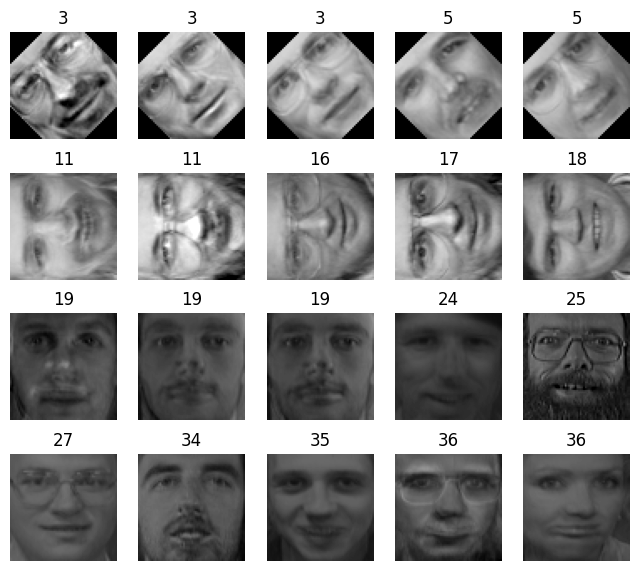

In [161]:
#Visualize wrong faces
X_wrong = np.concatenate((X_rotate, X_flip, X_darken), axis = 0)

plt.subplots(nrows = 4, ncols = 5, figsize = (8,7))
for i in range(len(X_wrong)):
    plt.subplot(4,5, i+1)
    plot_image(X_wrong[i])
    plt.title(y_new_faces[i])
    
    
plt.show()

In [156]:
#Visualize clusters
def plot_image(image):
    image = image.reshape(64,64)
    plt.imshow(image, cmap = "gray")
    plt.axis("off")

In [169]:
#Calculate mean densities
X_reduced_wrong = pca.transform(X_wrong)
mean_density_correct = gm.score_samples(X_reduced).mean()
mean_density_wrong = gm.score_samples(X_reduced_wrong).mean()
print(f"mean density of correct images: {mean_density_correct}. \n mean density wrong images: {mean_density_wrong}" )


mean density of correct images: 857.2793333866465. 
 mean density wrong images: -47855043.351433635


So GMM considers the wrong images highly unlikely

### 13) Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the recontruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

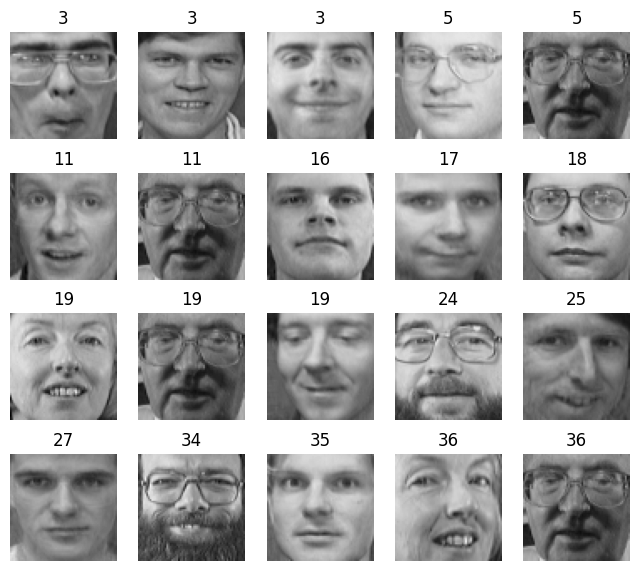

In [171]:
#Note that the bad faces were created upon the already reconstructed new faces.
#Then I reduced the bad faces to run GMM, and now I am going to reconstruct it again
#So we are adding too many error layers
X_reconstructed = pca.inverse_transform(X_reduced)
X_reconstructed_wrong = pca.inverse_transform(X_reduced_wrong)

#Plot 20 random correct faces
index = np.random.randint(0, len(X_reconstructed), 20)
X_right = X_reconstructed[index]

plt.subplots(nrows = 4, ncols = 5, figsize = (8,7))
for i in range(len(X_right)):
    plt.subplot(4,5, i+1)
    plot_image(X_right[i])
    plt.title(y_new_faces[i])
    
    
plt.show()

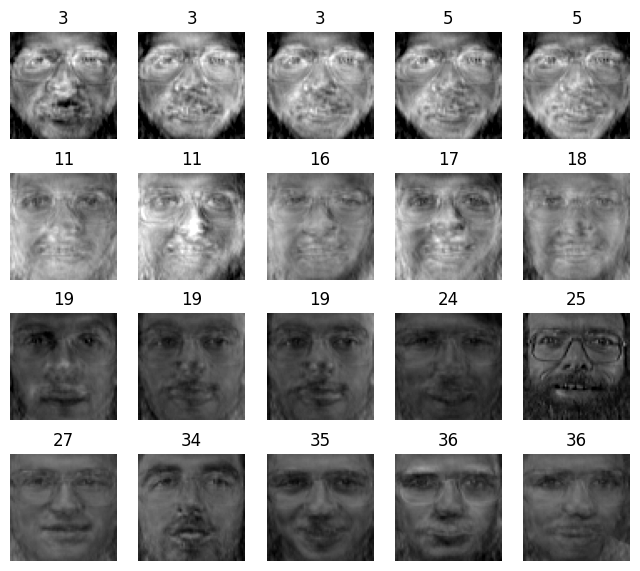

In [172]:
#Plot reconstructed bad faces
plt.subplots(nrows = 4, ncols = 5, figsize = (8,7))
for i in range(len(X_reconstructed_wrong)):
    plt.subplot(4,5, i+1)
    plot_image(X_reconstructed_wrong[i])
    plt.title(y_new_faces[i])
    
    
plt.show()

In [188]:
#MSE for all correct faces
error_right = np.mean((X_train-X_reconstructed)**2)
error_wrong = np.mean((X_wrong - X_reconstructed_wrong)**2)
print(f"MSE for correct faces: {error_right} \n MSE for wrong faces: {error_wrong}")

MSE for correct faces: 0.00019071517453994602 
 MSE for wrong faces: 0.00743384109009953
